## Sales Analysis


Import libraries

In [1]:
import os
import pandas as pd
# os: Miscellaneous operating system interfaces. File Names, Command Line Arguments, and Environment Variables. Python UTF-8 Mode. Process Parameters.

#### Task #1: Merging 12 months of sales data into a single CSV file

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
# listdir() method in python is used to get the list of all files and directories in the specified directory. 
# If we don't specify any directory, then list of files and directories in the current working directory will be returned.

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [3]:
df=pd.read_csv("/Users/neo/Desktop/own project/sales_analysisPro/Sales_Data/Sales_April_2019.csv")

files = [ file for file in os.listdir("/Users/neo/Desktop/own project/sales_analysisPro/Sales_Data")]
# listdir() method in python is used to get the list of all files and directories in the specified directory. 
# If we don't specify any directory, then list of files and directories in the current working directory will be returned.

all_months_data = pd.DataFrame()

for file in files:
    df=pd.read_csv("/Users/neo/Desktop/own project/sales_analysisPro/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv", index= False)


Read in updated dataframe

In [4]:
df= pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Review and change the data

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
df.describe().T

,count,unique,top,freq
Order ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity Ordered,186305,10,1,168552
Price Each,186305,24,11.95,21903
Order Date,186305,142396,Order Date,355
Purchase Address,186305,140788,Purchase Address,355


In [8]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df.isnull().sum()*100 / df.shape[0]

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

In [10]:
df= df.dropna(how="all")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [11]:
df.columns.value_counts()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [12]:
df.shape

(186305, 6)

##### Task 1: Find "Or" and drop it

In [13]:
df[df["Order Date"].str.startswith("Or")]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
# another solution 
df=df[df["Order Date"].str[:2] != "Or"]

#df =df[df["Order Date"].str.startswith("Or")].drop(index=1)

#df.apply(lambda x: x.drop(index=1) if x.str.startswith("Or") else x )


In [15]:
df[df["Order Date"].str.startswith("Or")]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Task 2: Add a Order Month column

In [16]:
df["Order Month"] = df["Order Date"].str[:2]
df["Order Month"] = df["Order Month"].astype("int32")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


##### Task 3: Add a Sales Column

###### Change the types of the Quantity Ordered and Price Each columns

In [17]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Order Month          int32
dtype: object

In [18]:
# Change the types of the Quantity Ordered and Price Each columns

df["Quantity Ordered"]=df["Quantity Ordered"].astype("int")
df["Price Each"]=df["Price Each"].astype("float")


#another solutions

#df["Quantity Ordered"]= pd.to_numeric(df["Quantity Ordered"])  #make int
#df["Price Each"]= pd.to_numeric(df["Price Each"])   # make float
#all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [19]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Order Month           int32
dtype: object

In [20]:
df["Sales"] = df["Quantity Ordered"] *  df["Price Each"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


##### Task 4: Add a city column

In [21]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df["City"] = df["Purchase Address"].apply(lambda x : get_city(x) + " (" + get_state(x) + ")" )
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


#### Question 1: What was the best month of for sales? How much was earned that month ?

In [22]:
df.groupby("Order Month")["Sales"].sum().max()

4613443.34

In [23]:
month_sum=df.groupby("Order Month").sum()
month_sum

,Quantity Ordered,Price Each,Sales
Order Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


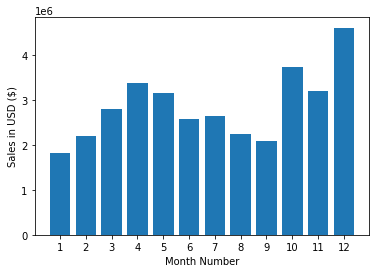

In [24]:
import matplotlib.pyplot as plt    
months =range (1,13)
plt.bar(months, month_sum["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Number")
plt.show()


#### Question 2: What city had the highest number of sales?

In [25]:
city_sum_asc= df.groupby("City")["Sales"].sum().sort_values(ascending=False)
city_sum_asc

City
 San Francisco (CA)    8262203.91
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Boston (MA)           3661642.01
 Atlanta (GA)          2795498.58
 Dallas (TX)           2767975.40
 Seattle (WA)          2747755.48
 Portland (OR)         1870732.34
 Austin (TX)           1819581.75
 Portland (ME)          449758.27
Name: Sales, dtype: float64

In [26]:
city_sum=df.groupby("City").sum()
city_sum["Sales"].sort_values(ascending=False)

City
 San Francisco (CA)    8262203.91
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Boston (MA)           3661642.01
 Atlanta (GA)          2795498.58
 Dallas (TX)           2767975.40
 Seattle (WA)          2747755.48
 Portland (OR)         1870732.34
 Austin (TX)           1819581.75
 Portland (ME)          449758.27
Name: Sales, dtype: float64

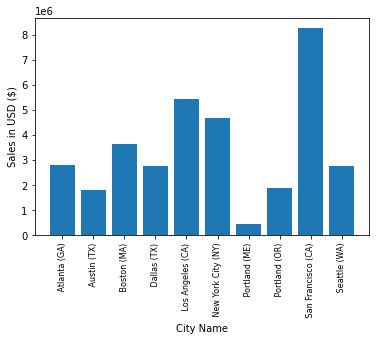

In [27]:
#cities = df["City"].unique()
cities = [city for city, df in df.groupby(['City'])]
plt.bar(cities, df.groupby(['City']).sum()['Sales'])
plt.xticks(cities, rotation = "vertical", size = 8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")
plt.show()

#### Question 3: What time should we display adverstisments to maximize likelihood of customer's buying product?

In [31]:
df["Order Date"]= pd.to_datetime(df["Order Date"])
# This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

In [33]:
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
# dt :Accessor object for datetimelike properties of the Series values.

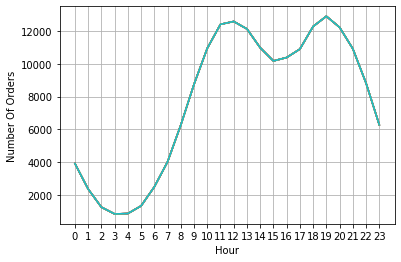

In [39]:
hours = [ hour for hour, df in df.groupby("Hour")]

plt.plot(hours, df.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number Of Orders")
plt.grid()
plt.show()
# My recommendation is around 13 or 20

In [44]:
pd.options.mode.chained_assignment = None

#### Question 4: What products are most often sold together?

In [45]:
a = df[df["Order ID"].duplicated(keep=False)]
a["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))
a = a[["Order ID","Grouped"]].drop_duplicates()
a.head()

#Only consider certain columns for identifying duplicates, by default use all of the columns.

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [53]:
from itertools import combinations 
from collections import Counter

count = Counter()

for row in a["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### Question 5: What product sold the most? Why do you think it sold the most?

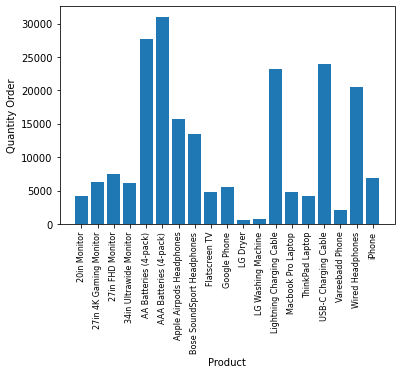

In [59]:
product_grouped = df.groupby("Product")
quantity_ordered = product_grouped.sum()["Quantity Ordered"]
products = [product for product, a in product_grouped]
plt.xlabel("Product")
plt.ylabel("Quantity Order")
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation="vertical",size=8);


In [60]:
prices = df.groupby("Product").mean()["Price Each"]
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/var/folders/zm/xhk252y95rg_c6v1_bntkztc0000gn/T/ipykernel_2276/4161710793.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


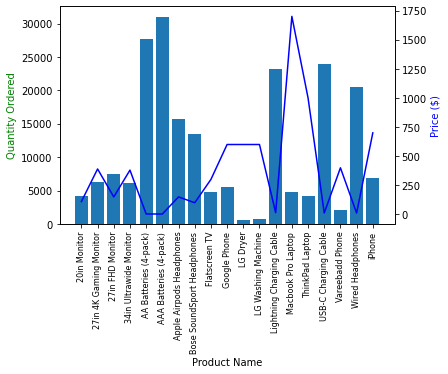

In [71]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()